In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',61)

### 1.Data Ingestion:

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
a = df.columns.str[1:]
df = pd.read_csv("OnlineNewsPopularity.csv",names=a,skiprows=1)

# column names have space in it, removed it

In [5]:
df.drop('rl',axis=1,inplace=True)

# dropping url column as it has no significance

In [6]:
df['shares'].median()

1400.0

In [7]:
def clas(n):
    if (n<1400 ):
        return(0)
    else: return (1)

In [8]:
df["shares"] = df['shares'].apply(clas)
# Shares is the target variable
# converting shares to classification 
# values below 1400 taken as 0 and values above and equal to 1400 taken as 1

In [9]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,0.533599
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,0.498876
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0

In [10]:
df.isnull().sum()

# no null null values present

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null flo

### 2. Split Data set:

In [12]:
x = df.drop('shares',axis=1)
y = df['shares']

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [14]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l1',random_state=7)
log.fit(xtrain,ytrain)
pred = log.predict(xtest)
print("Training Score:",log.score(xtrain,ytrain))
print("Testing Score:",log.score(xtest,ytest))
from sklearn.metrics import accuracy_score
print("Accuracy Of Model:",accuracy_score(ytest,pred))

# here testing score is slightly less than training score therefore model is a little overfit
# accuracy is not that goot 65.53% only

Training Score: 0.6556036036036036
Testing Score: 0.6550361526820245
Accuracy Of Model: 0.6550361526820245


### 3. Build a base model:

In [15]:
log.fit(xtrain,ytrain)
pred = log.predict(xtest)
print("Training Score:",log.score(xtrain,ytrain))
print("Testing Score:",log.score(xtest,ytest))
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,recall_score,precision_score
print("Accuracy Of Model:",accuracy_score(ytest,pred))
print("F1 Score Of Model:",f1_score(ytest,pred))
print("ROC AUC Score Of Model:",roc_auc_score(ytest,pred))
print()
print("Recall Score Of Model:",recall_score(ytest,pred))
print("Precision Score Of Model:",precision_score(ytest,pred))
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.6556036036036036
Testing Score: 0.6550361526820245
Accuracy Of Model: 0.6550361526820245
F1 Score Of Model: 0.6838739502272901
ROC AUC Score Of Model: 0.6518822982137982

Recall Score Of Model: 0.702437480215258
Precision Score Of Model: 0.6662663263774208

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3353         2223
Actual:1         1880         4438


The confusion matrix shows 3353 + 4438 = 7791 correct predictions and 2221 + 1883 = 4103 incorrect ones.

**<font color=DarkBlue>True Positives:**  4438<font>

**<font color=DarkBlue>True Negatives:**  3353<font>

**<font color=DarkBlue>False Positives:** 2223 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 1880 ( *Type II error*)<font>

Accuracy Of Model: 0.6548680006726081
F1 Score Of Model: 0.6834271612554947
ROC AUC Score Of Model: 0.6517766755093394

#### All Three scores are in same range so thats good, now we can improve the model by increasing or decreasing the number of shares we want above 1400 or below 1400

Recall Score Of Model: 0.702437480215258
Precision Score Of Model: 0.6662663263774208

#### As we wouldn't want less shares value(0) to fall in more share value(1), so we need to decrease the false positives, i.e. if a number of shares are less for a person and it shows more than it will be a loss for the company and opposite case company would earn. So, we need to increase precision and decrease recall

### 4. EDA -  Plots:

#### A.	Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

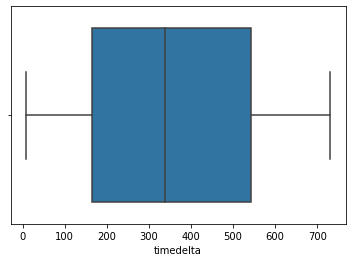

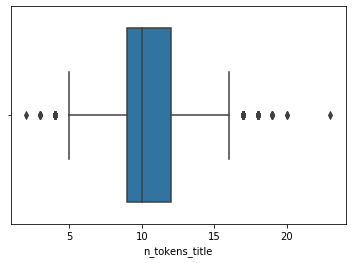

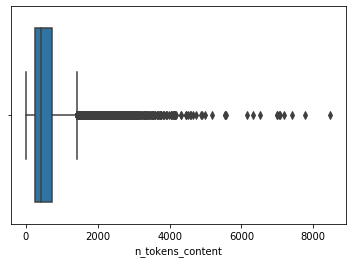

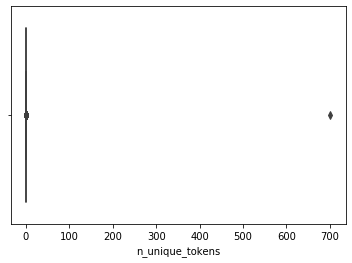

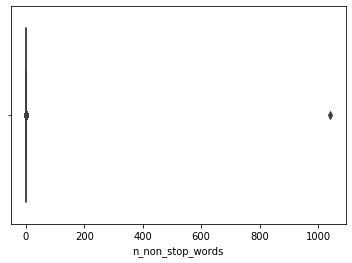

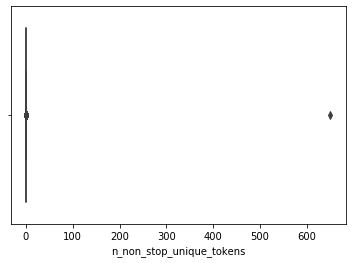

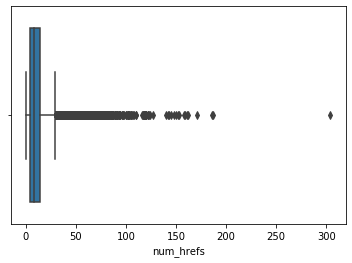

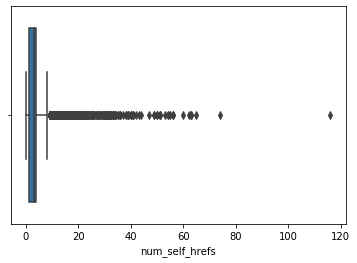

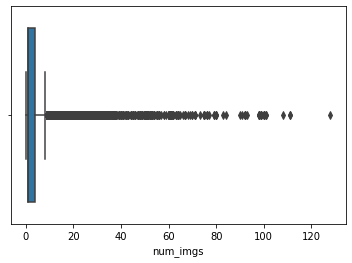

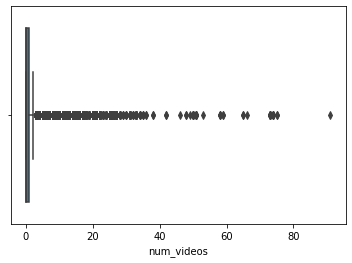

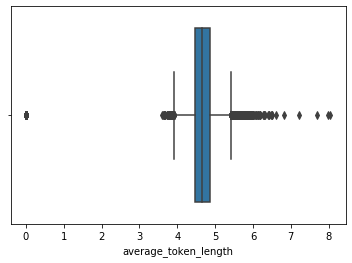

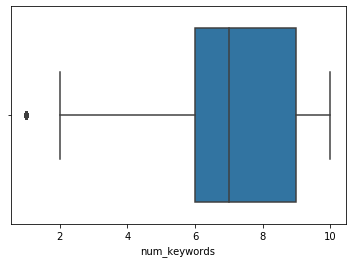

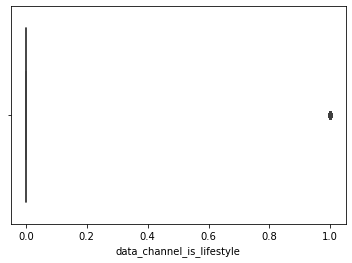

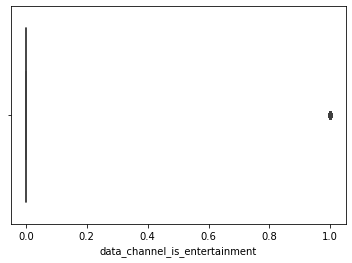

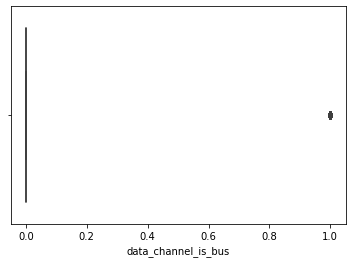

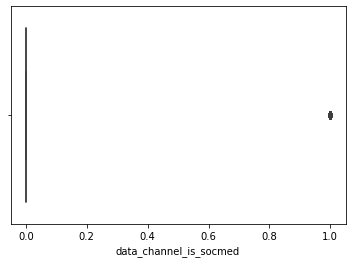

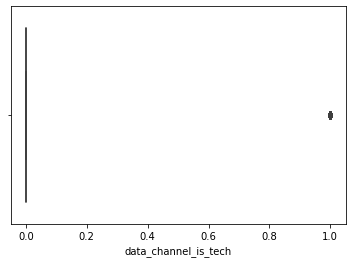

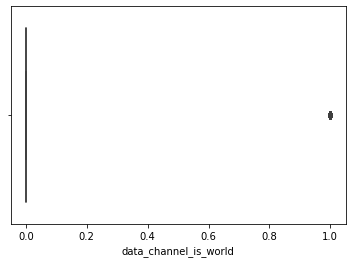

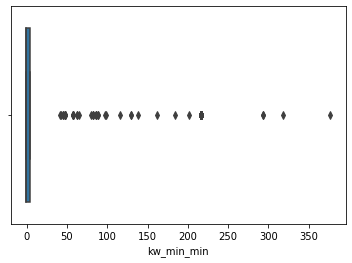

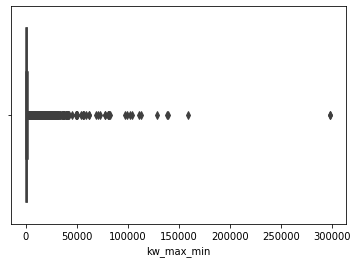

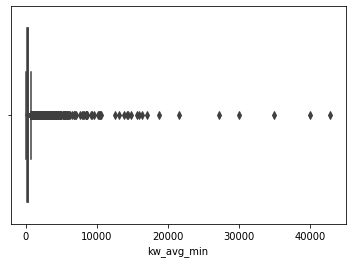

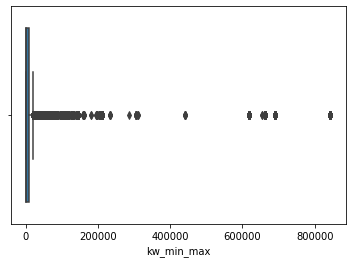

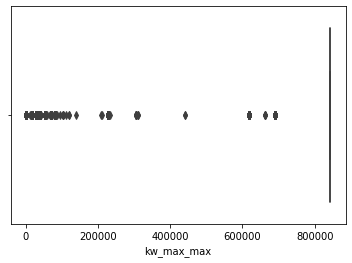

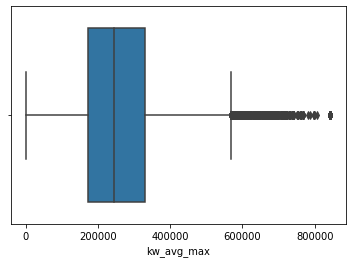

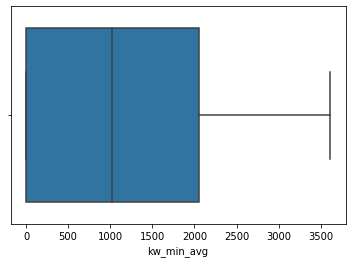

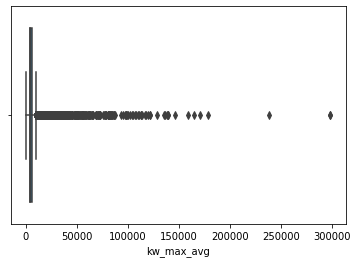

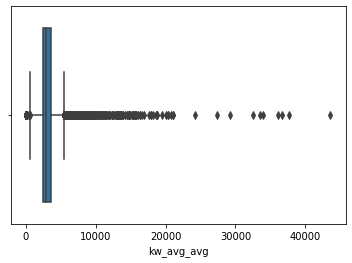

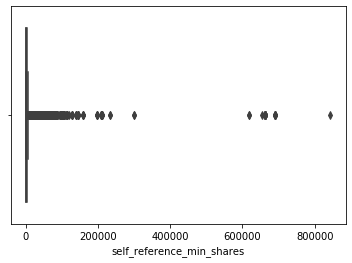

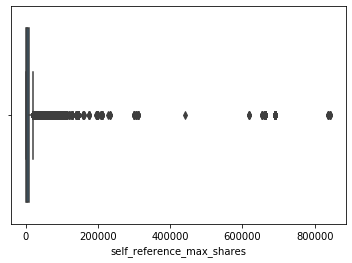

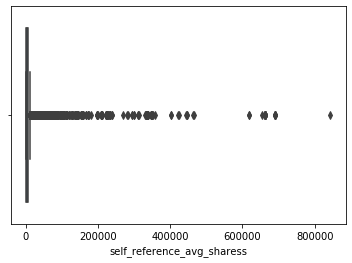

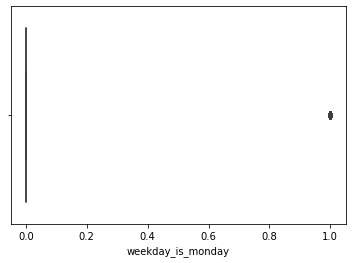

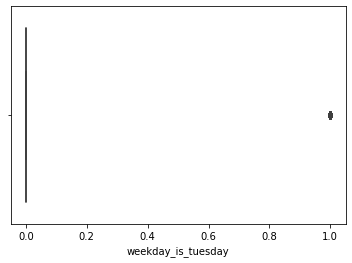

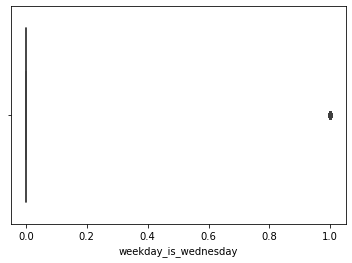

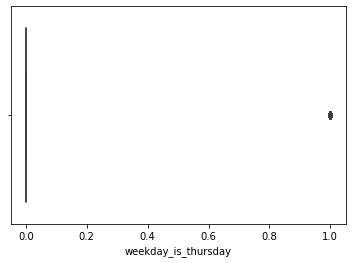

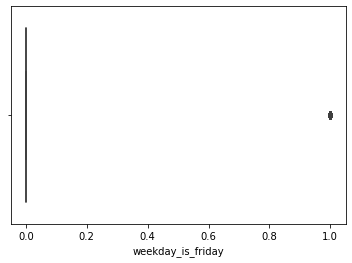

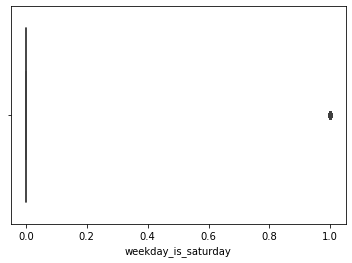

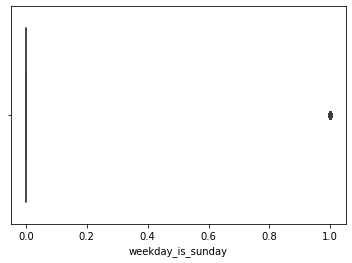

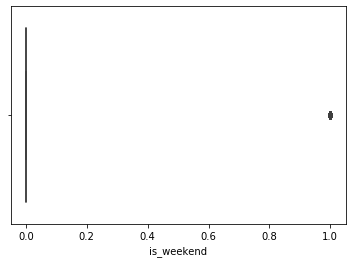

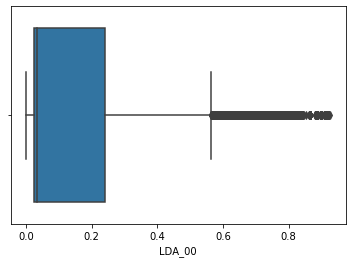

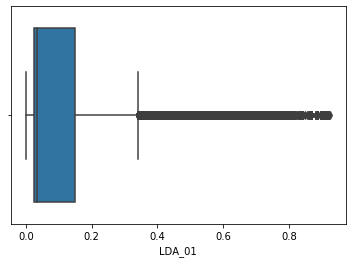

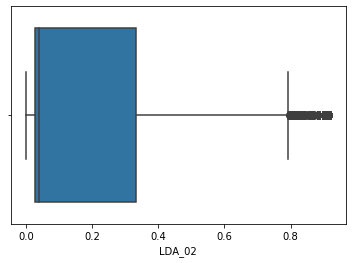

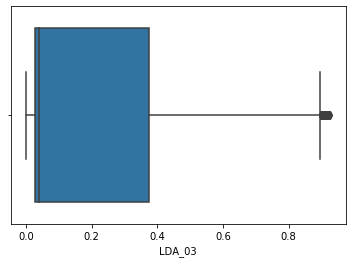

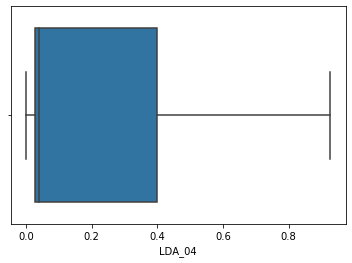

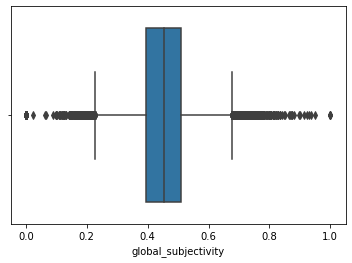

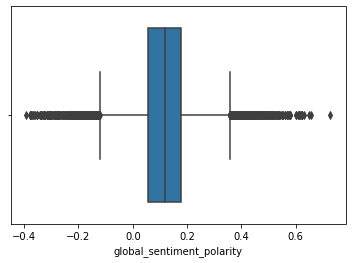

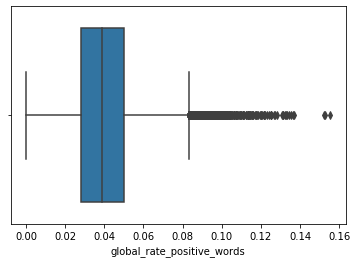

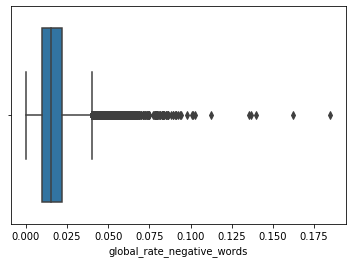

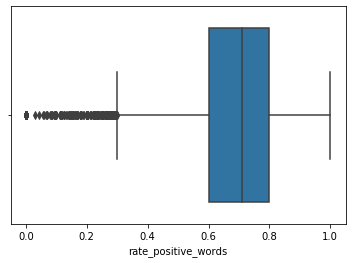

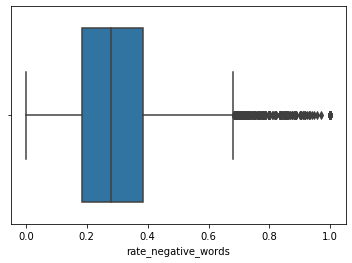

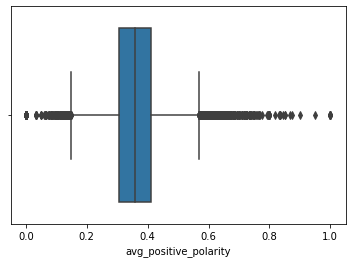

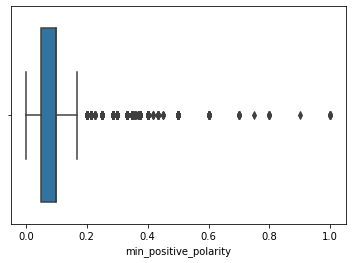

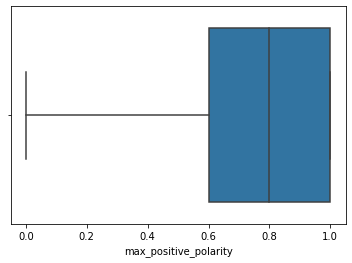

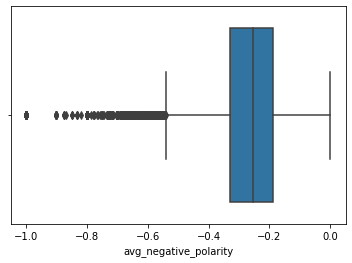

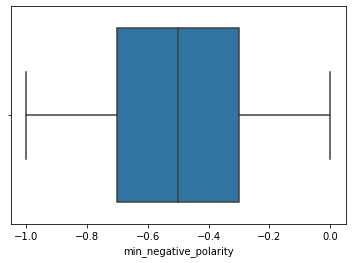

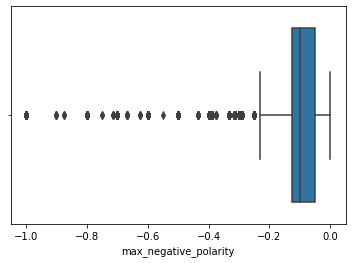

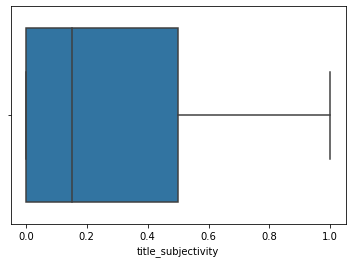

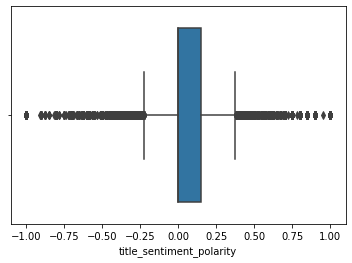

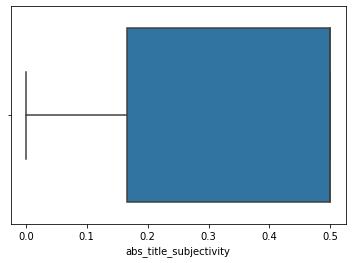

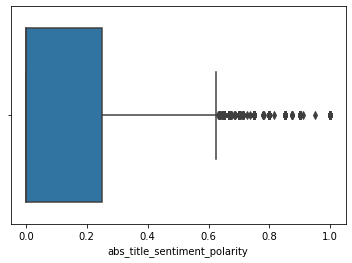

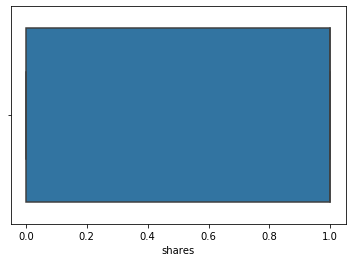

In [16]:
for i in list(df.columns):
    sns.boxplot(df[i])
    plt.show()

#### B.	Apply correlation plot and display with colour code and numerical indication

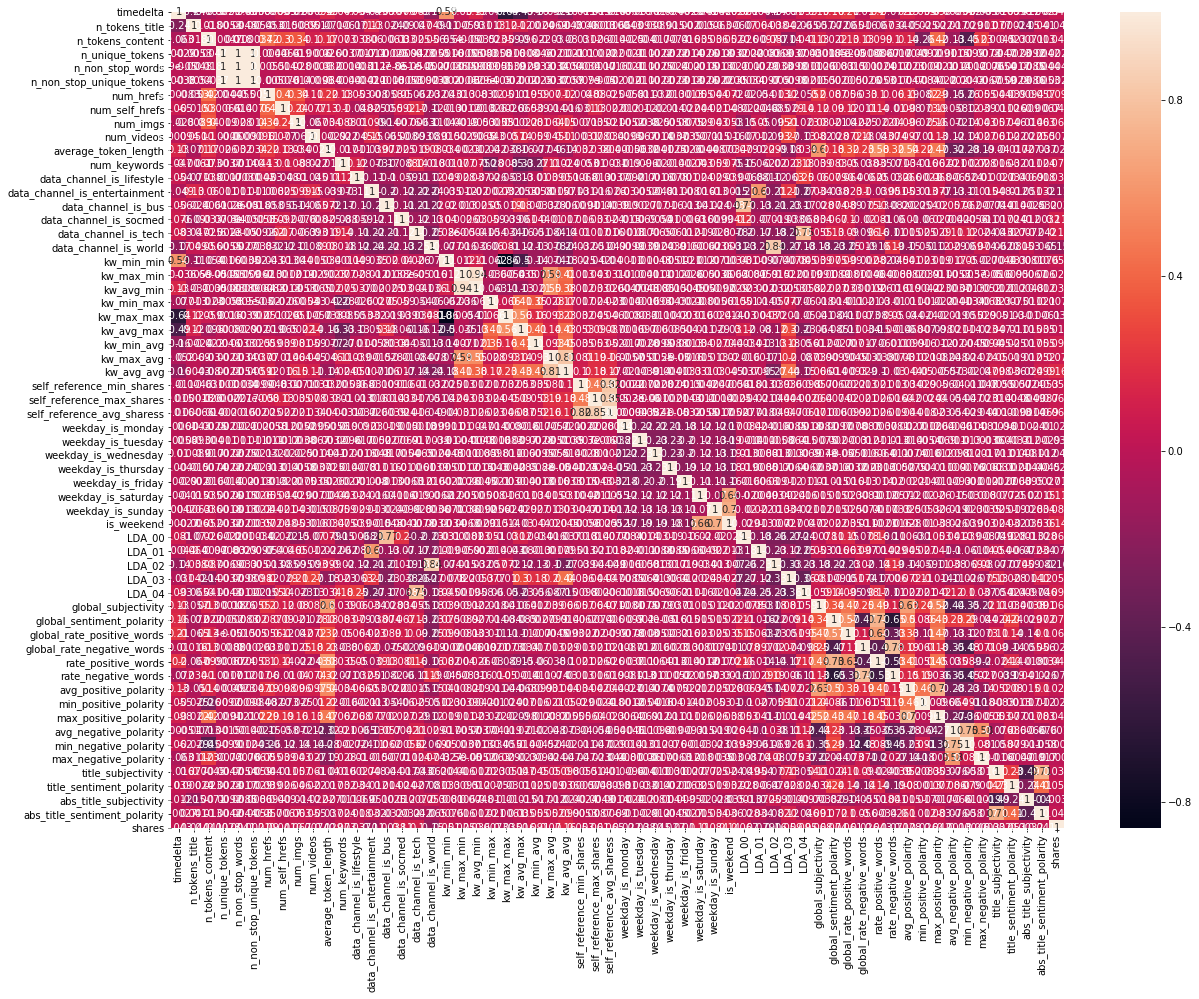

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

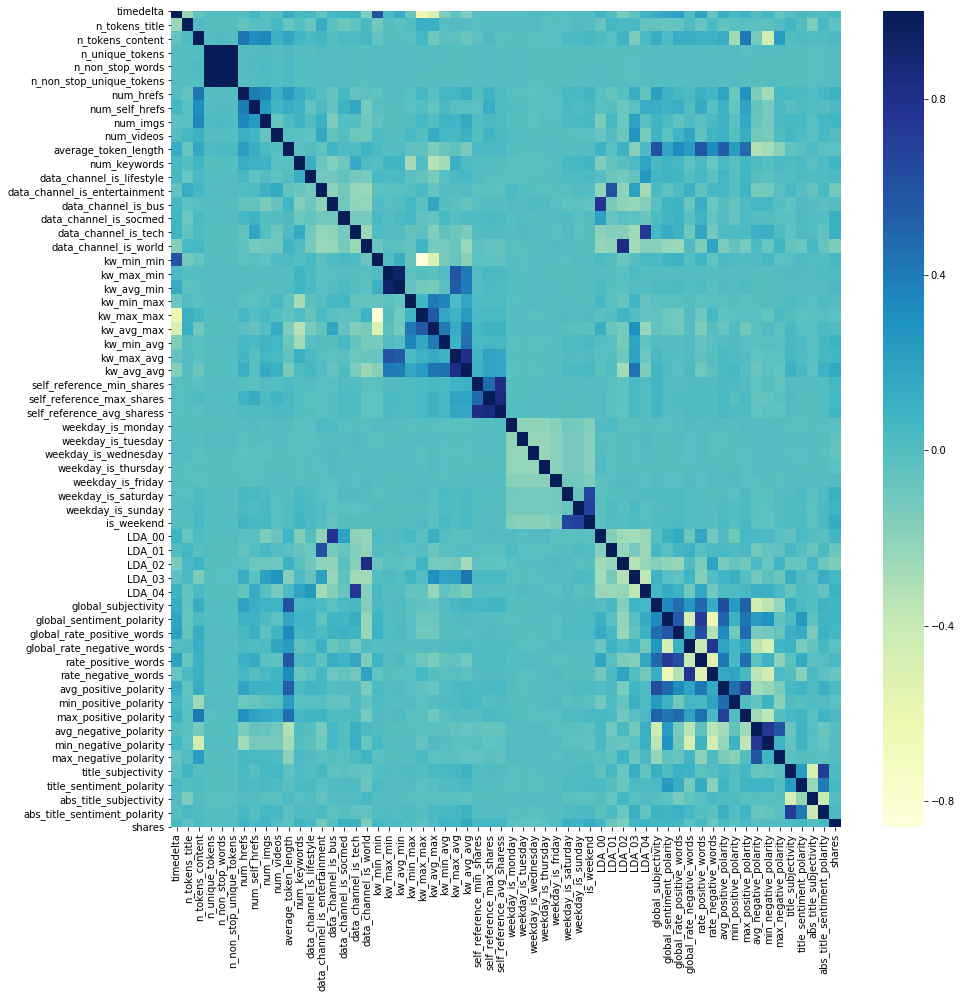

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

#### C.	Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

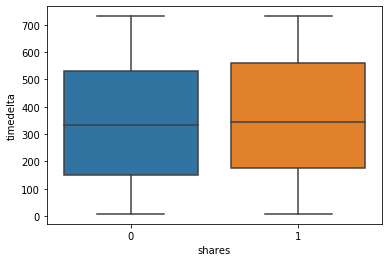

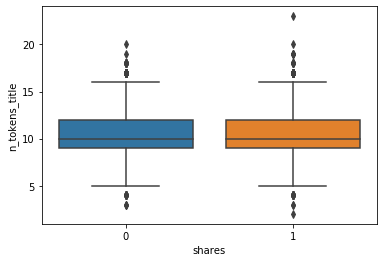

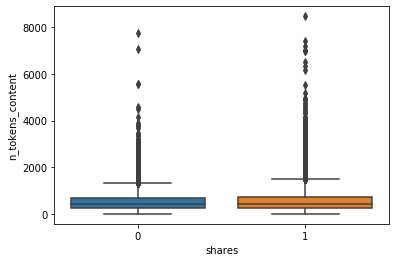

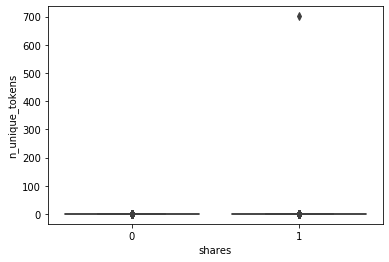

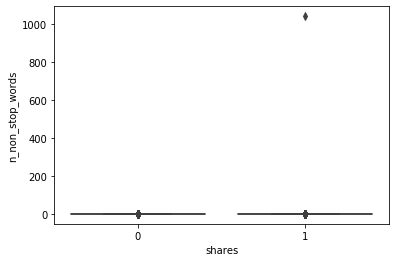

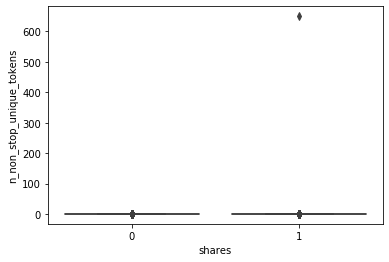

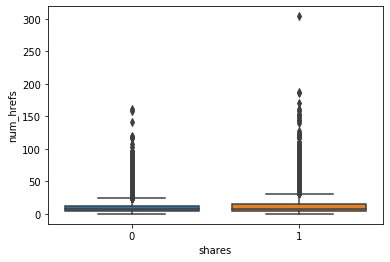

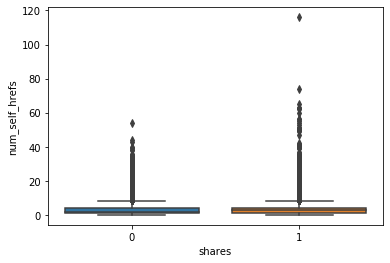

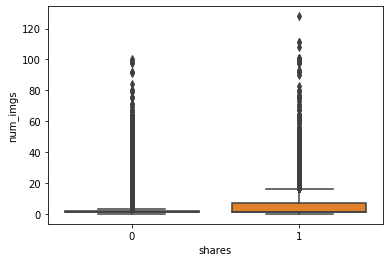

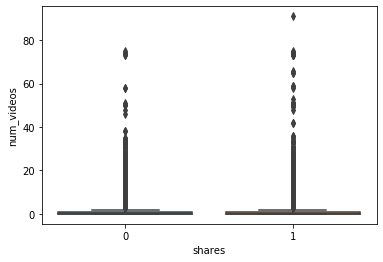

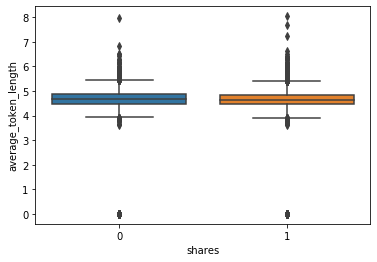

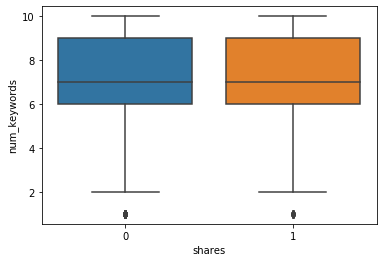

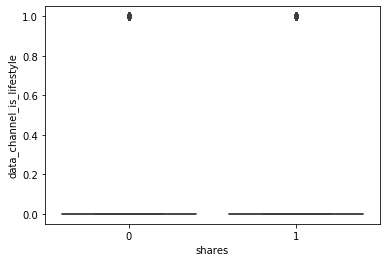

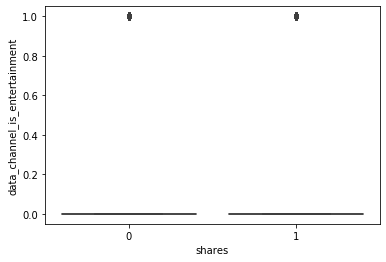

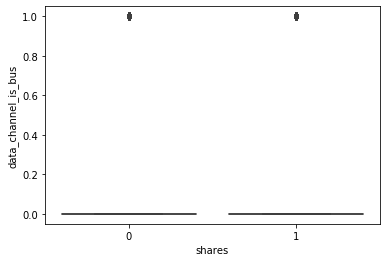

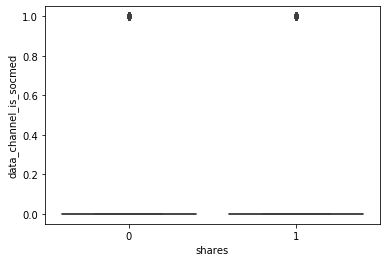

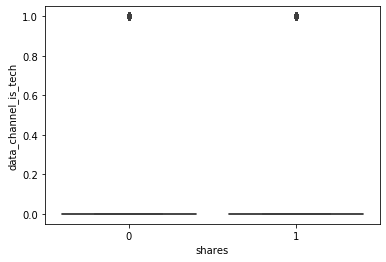

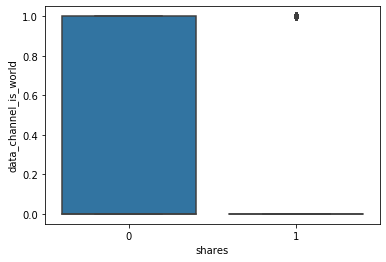

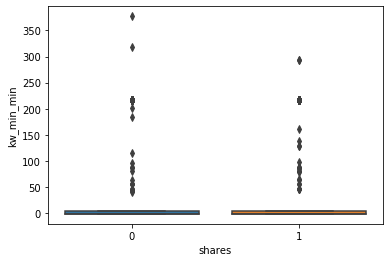

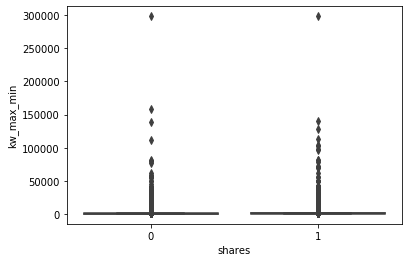

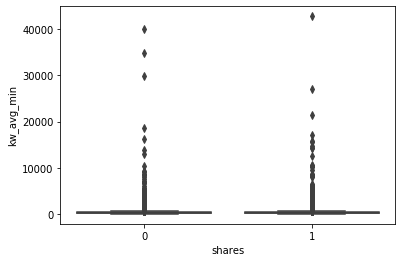

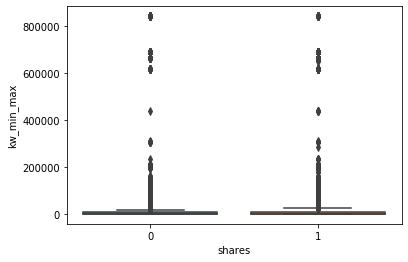

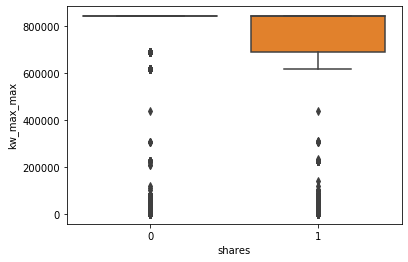

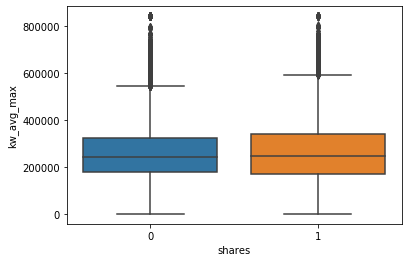

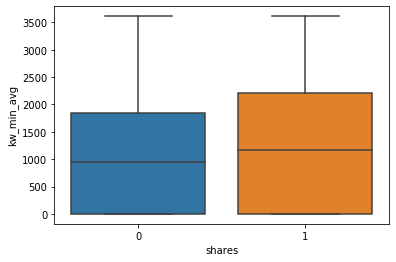

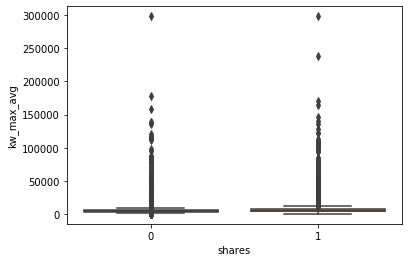

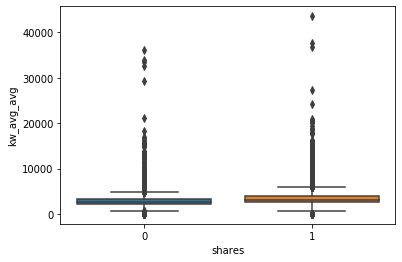

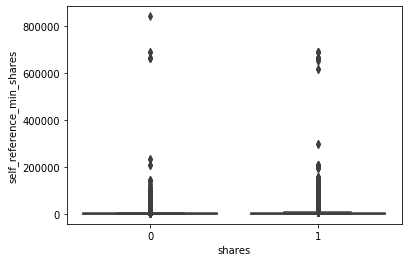

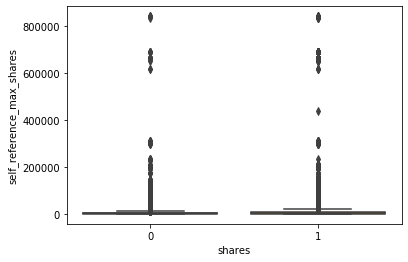

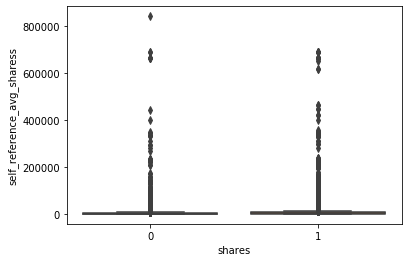

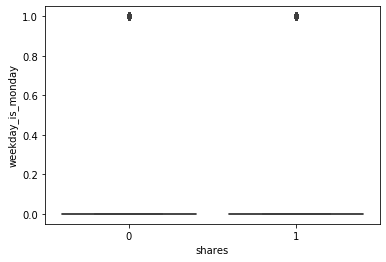

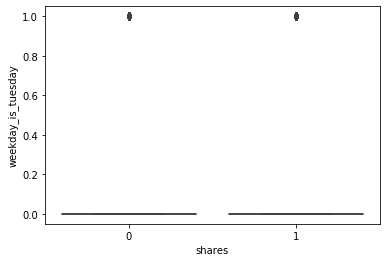

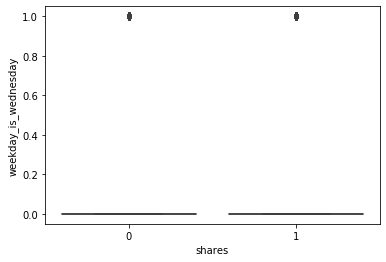

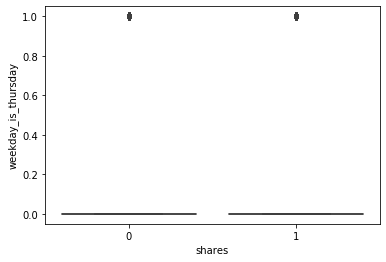

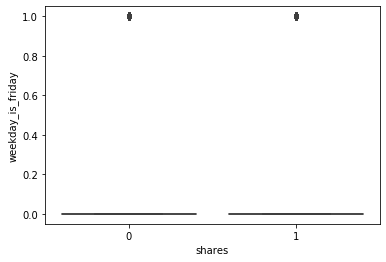

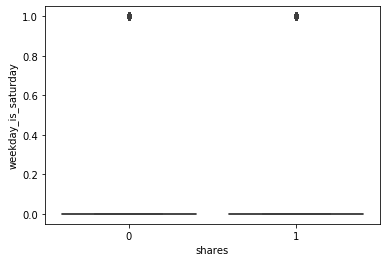

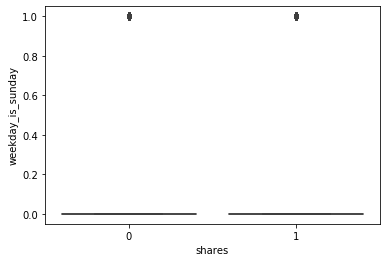

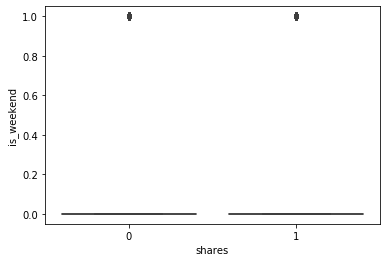

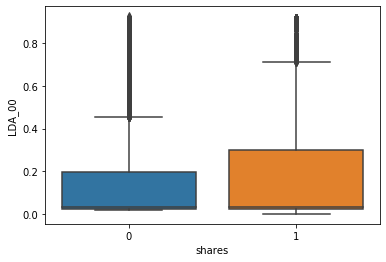

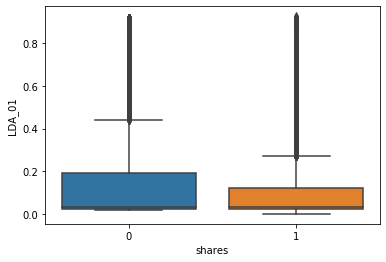

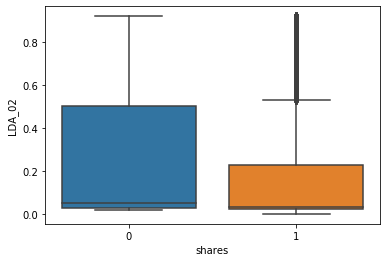

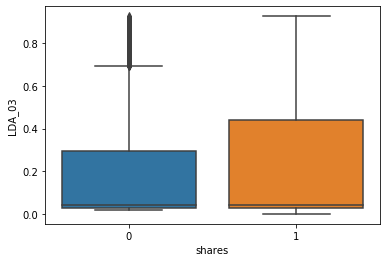

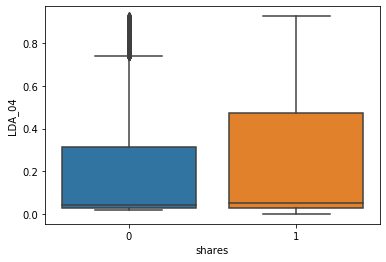

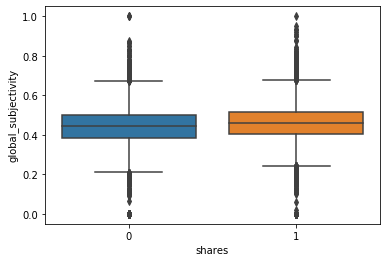

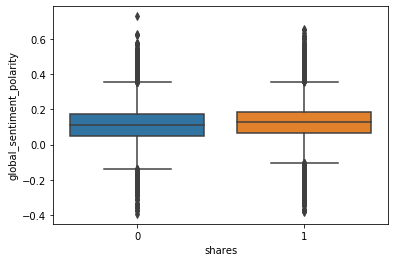

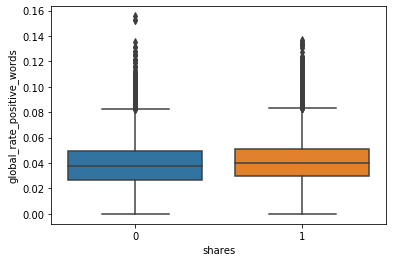

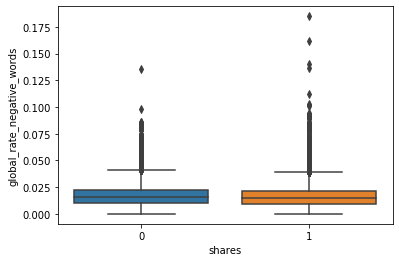

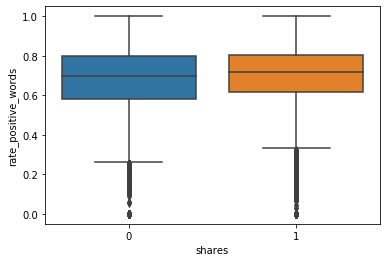

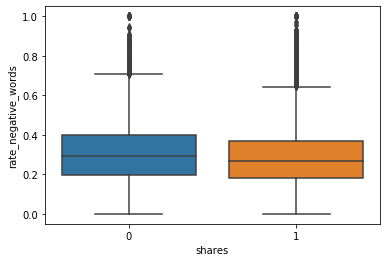

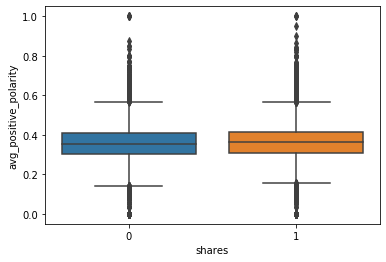

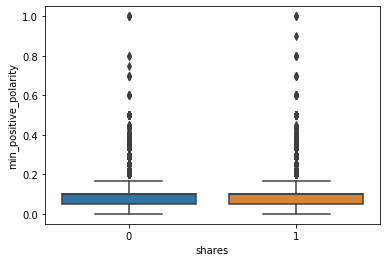

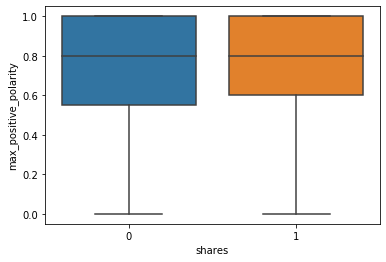

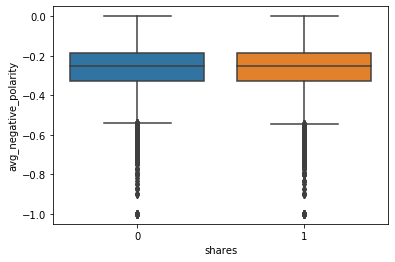

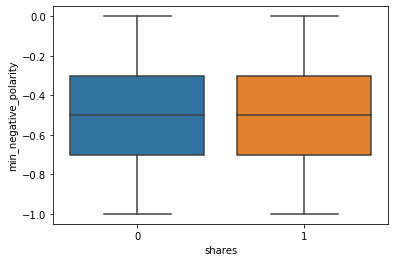

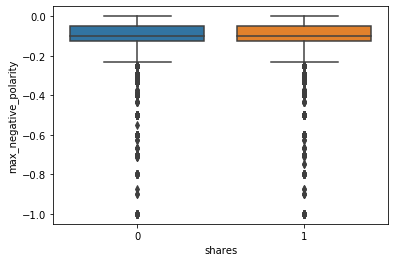

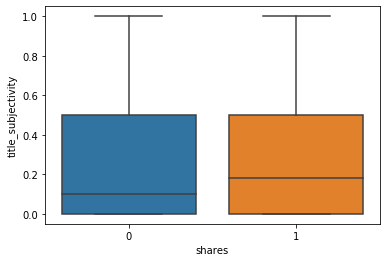

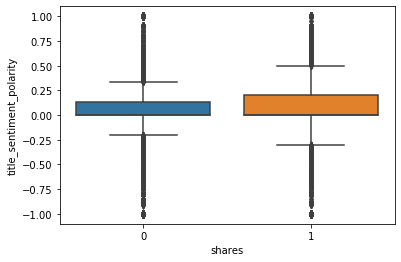

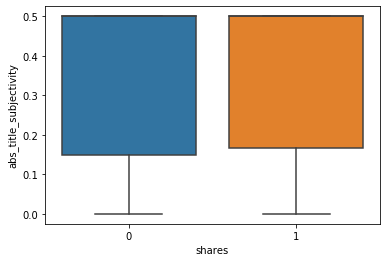

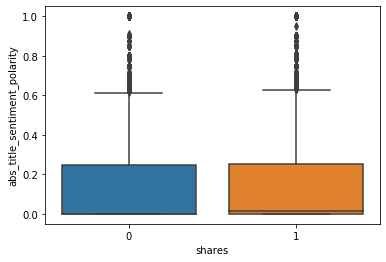

In [19]:
for i in list(x.columns):
    sns.boxplot(y=x[i],x=y)
    plt.show()

#### D.	Apply density plot and check if the data is normally distributed

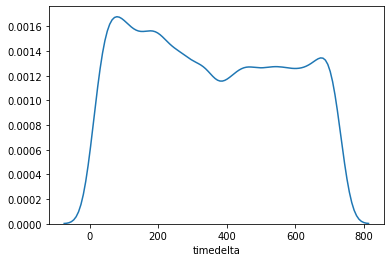

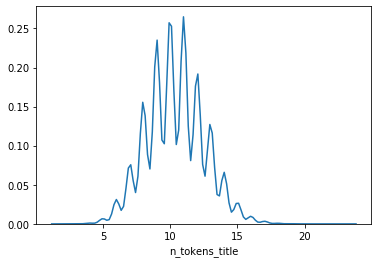

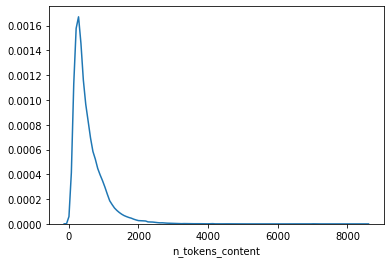

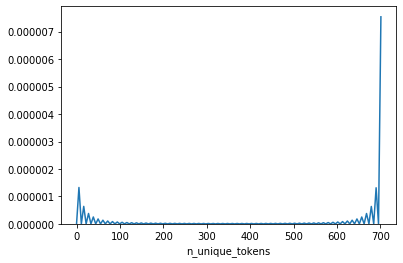

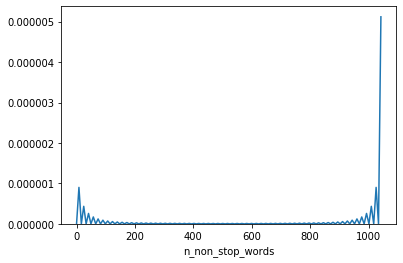

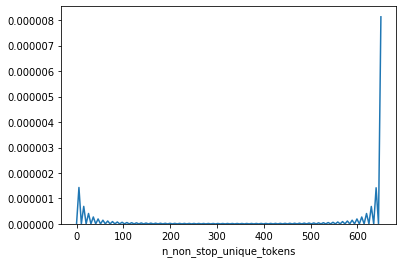

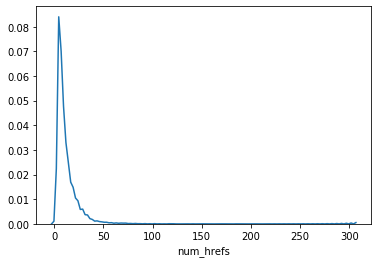

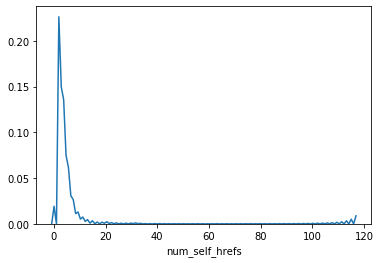

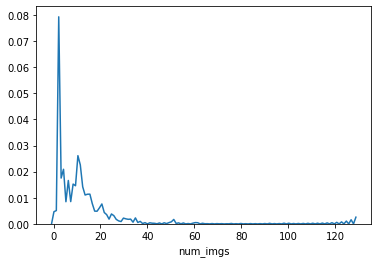

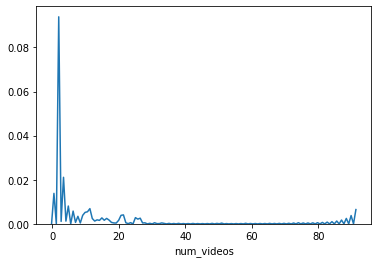

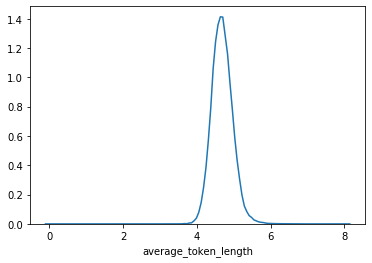

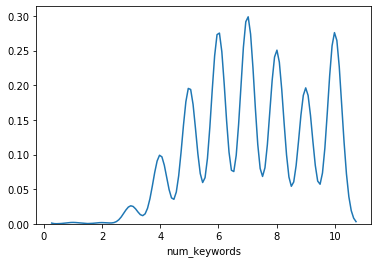

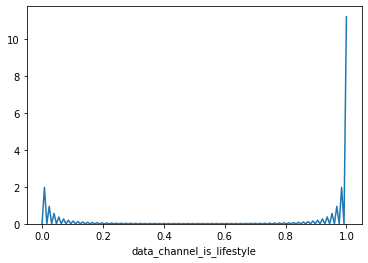

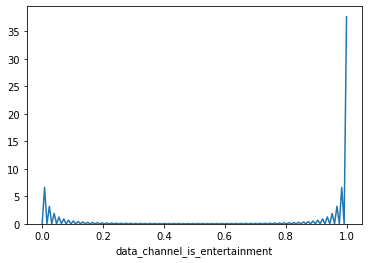

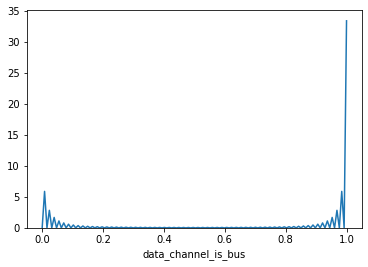

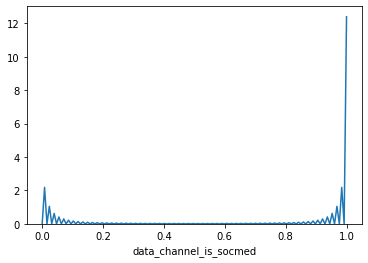

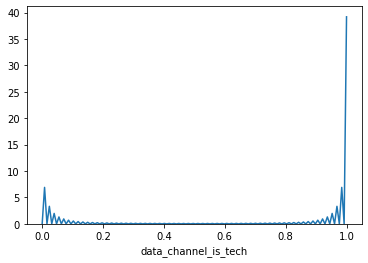

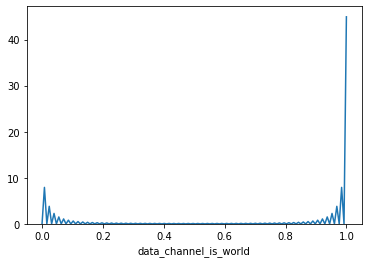

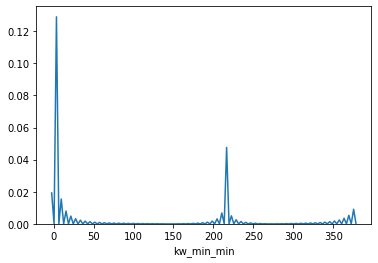

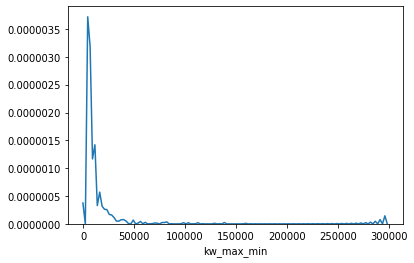

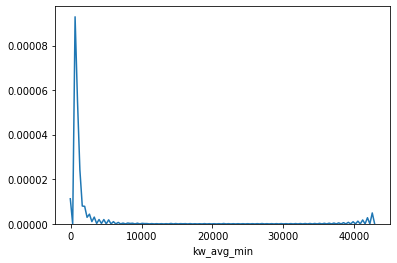

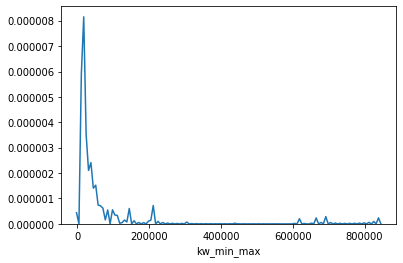

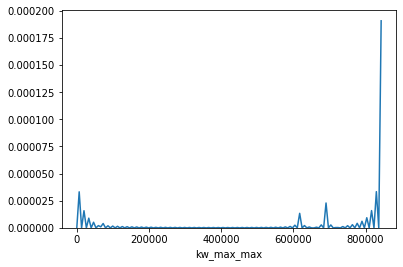

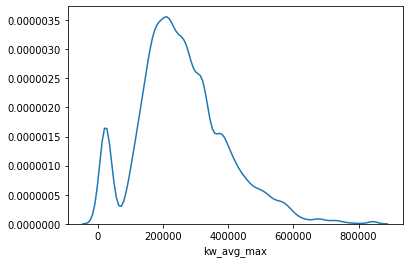

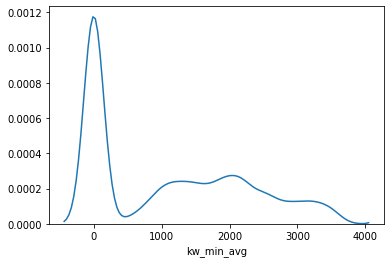

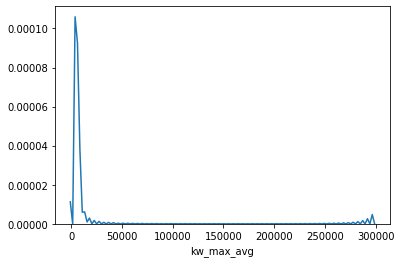

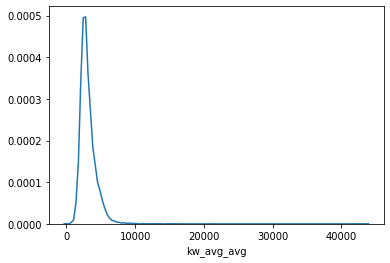

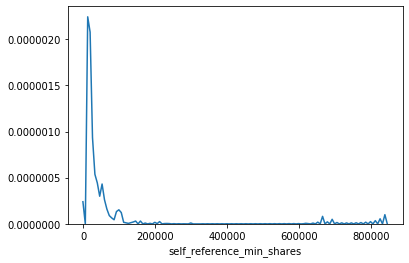

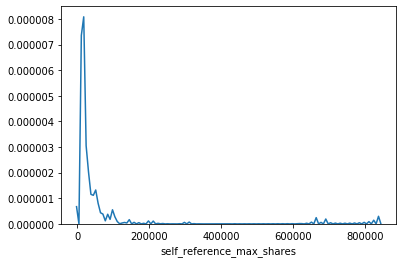

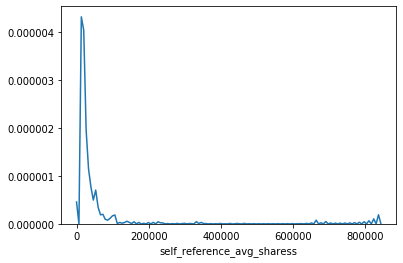

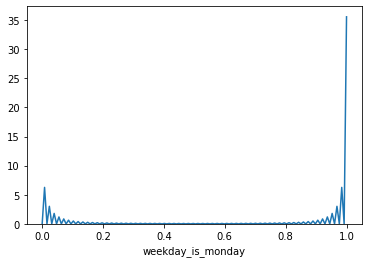

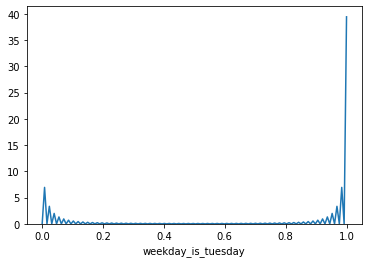

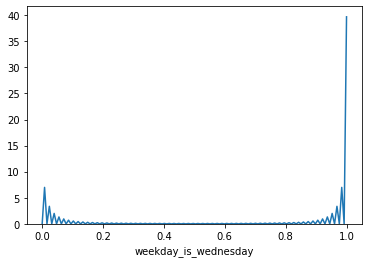

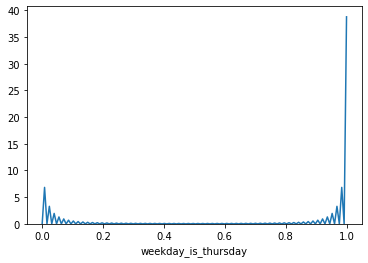

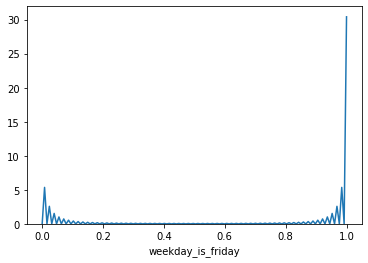

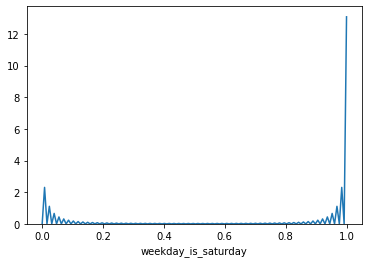

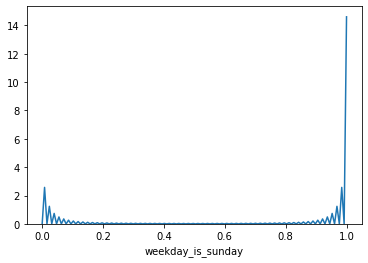

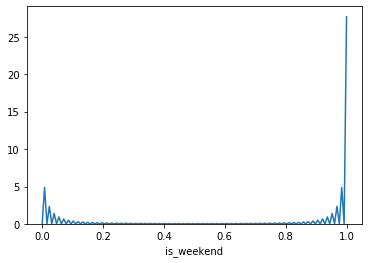

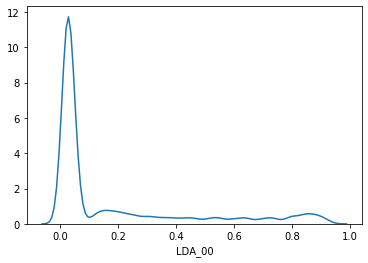

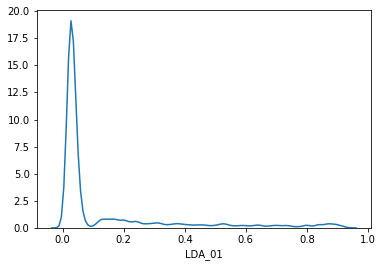

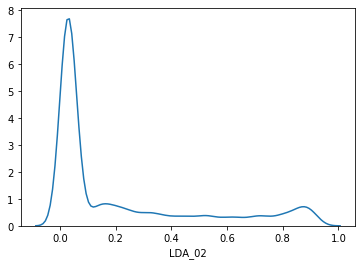

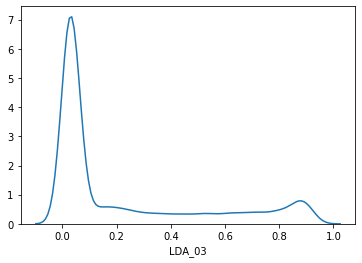

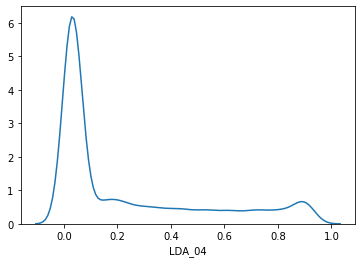

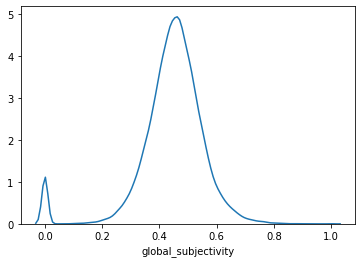

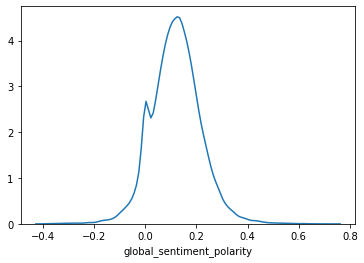

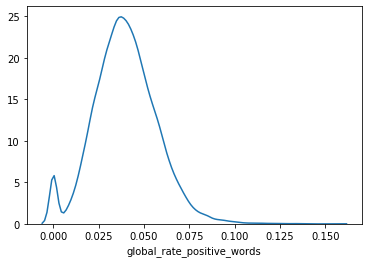

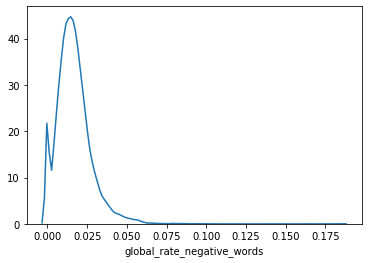

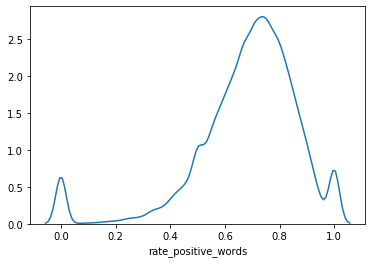

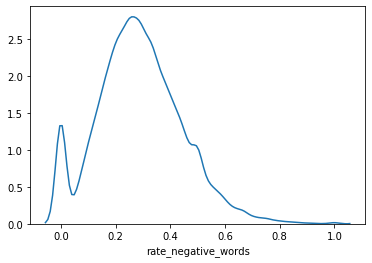

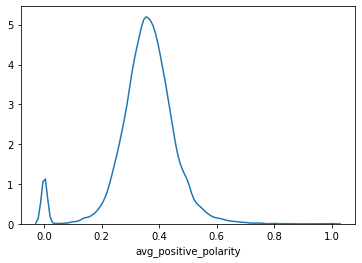

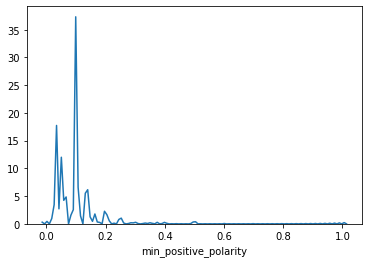

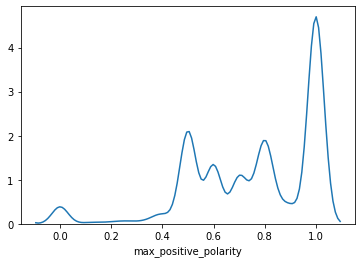

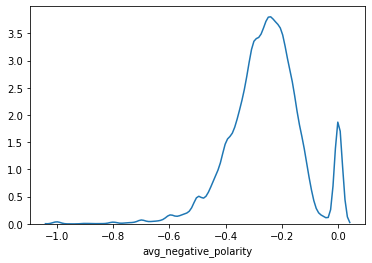

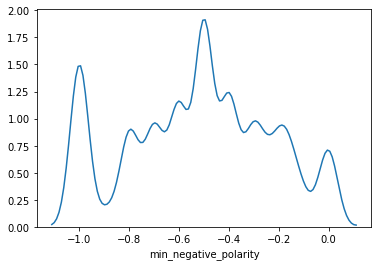

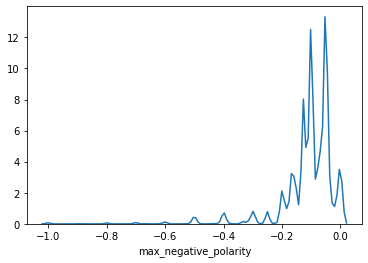

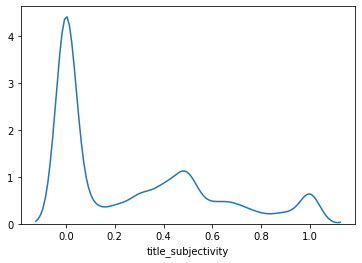

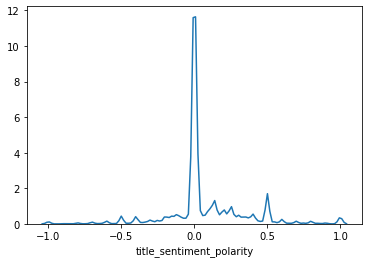

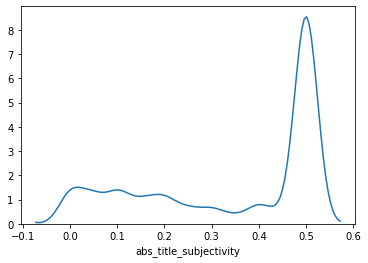

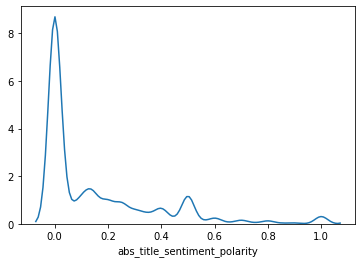

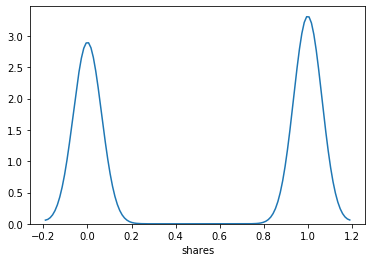

In [20]:
for i in list(df.columns):
    sns.distplot(df[i],hist=False)
    plt.show()

### 5. EDA - Inference:

1. The Follwing Coulmns has outliers:
   ' n_tokens_title', ' n_tokens_content','n_unique_tokens',n_non_stop , ' num_hrefs', ' num_self_hrefs', ' num_imgs', '      num_videos',' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',' kw_min_max', '       kw_max_max', ' kw_avg_max',' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',' self_reference_max_shares', ' self_reference_avg_sharess',' LDA_00', ' LDA_01', ' LDA_02',' LDA_03', ' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words',' global_rate_negative_words', ' rate_positive_words',' rate_negative_words', ' avg_positive_polarity',' min_positive_polarity','avg_negative_polarity','max_negative_polarity','title_sentiment_polarity',
 ' abs_title_sentiment_polarity'
   Most of the non categorical columns have outliers.We can treat the outliers by using the z_score or by using the     interquartile range(q1 - 1.5 iqr, q1 + 1.5 iqr)
   
   
2. Since the data is haing 60 columns so having the numerical annotation will decrease the readibilty of the graph.
n_unique_tokens, n_non_stop_words and n_non_stop_unique_words asre having very high negative  correlation between each other.k_min_min and k_min_max are highly positively correlated with each other. 

3. other than data_channel_is_entertainment,is_weekend,data_channel_is_world colunms , other columns doesn't have any relationship with share_status

4. apart from kw_max_max, kw_min_avg, LDA_00,LDA_02,LDA_03 and LDA_04 no column has any relationship with share status

5. average_token_length, global_subjectivity, global_sentiment_polarity, avg_positive_polarity are having a approximate normal distribution.
Rest other are either skewed or are having muli model peaks

### 6. Label Encoding / Get Dummies:

In [21]:
df.dtypes

timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg      

In [22]:
# already done so need to do it again

### 7. Data handling:

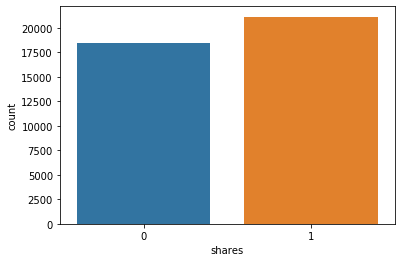

In [23]:
sns.countplot(y)
plt.show()

#### As the data is not imbalanced so need of SMOTE, we can directly use the data available

When in classification problem the target variable has high count for one category than the other, that dataset is said to imbalanced.

We either increase the minority category upto majority category level(count) this is known as Over-Sampling(SMOTE in imblearn) or decrease the majority category upto miniority level(count) this is known as Under-Sampling (Near Miss in imblearn)


### 8. Feature selection and Feature engineering

In [24]:
# Applying Backward Elimination

In [25]:
import statsmodels.api as sm
df['constant']=1
model=sm.Logit(df['shares'],df.drop('shares',axis=1))
result=model.fit()
result.summary()

         Current function value: 0.623473
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 shares   No. Observations:                39644
Model:                          Logit   Df Residuals:                    39587
Method:                           MLE   Df Model:                           56
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.09758
Time:                        14:07:47   Log-Likelihood:                -24717.
converged:                      False   LL-Null:                       -27390.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                     -1.715e-05   7.34e-05     -0.234      0.815      -0.000       0.000
n_tokens_title                    0.0021      0.005      0.386      0.700      -0.009       0.013
n_tokens_content                  0.0001    4.4e-05      2.974      0.003    4.47e-05       0.000
n_unique_tokens                  -0.0872      0.363     -0.240      0.810      -0.798       0.624
n_non_stop_words                  2.6902      1.533      1.754      0.079      -0.315       5.696
n_non_stop_unique_tokens         -0.5818      0.307     -1.897      0.058      -1.183       0.019
num_hrefs                         0.0087      0.001      6.516      0.000       0.006       0.011
num_self_hrefs                   -0.0182      0.004     -5.195      0.000      -0.025      -0.011
num_imgs                          0.0019      0.002      1.093      0.274      -0.001       0.005
num_videos                        0.0005      0.003      0.165      0.869      -0.005       0.006
average_token_length             -0.1367      0.045     -3.005      0.003      -0.226      -0.048
num_keywords                      0.0430      0.007      6.159      0.000       0.029       0.057
data_channel_is_lifestyle        -0.1100      0.075     -1.464      0.143      -0.257       0.037
data_channel_is_entertainment    -0.2936      0.047     -6.182      0.000      -0.387      -0.201
data_channel_is_bus              -0.1741      0.072     -2.402      0.016      -0.316      -0.032
data_channel_is_socmed            0.8689      0.074     11.813      0.000       0.725       1.013
data_channel_is_tech              0.5387      0.070      7.694      0.000       0.401       0.676
data_channel_is_world             0.0536      0.071      0.759      0.448      -0.085       0.192
kw_min_min                        0.0019      0.000      6.259      0.000       0.001       0.003
kw_max_min                     2.453e-05   1.21e-05      2.034      0.042    8.96e-07    4.82e-05
kw_avg_min                       -0.0002   7.62e-05     -2.413      0.016      -0.000   -3.45e-05
kw_min_max                    -5.866e-07   2.15e-07     -2.734      0.006   -1.01e-06   -1.66e-07
kw_max_max                    -3.187e-07   1.12e-07     -2.852      0.004   -5.38e-07   -9.97e-08
kw_avg_max                    -5.935e-07    1.6e-07     -3.710      0.000   -9.07e-07    -2.8e-07
kw_min_avg                     -9.01e-05   1.46e-05     -6.154      0.000      -0.000   -6.14e-05
kw_max_avg                    -9.036e-05   5.09e-06    -17.750      0.000      -0.000   -8.04e-05
kw_avg_avg                        0.0007   2.92e-05     24.664      0.000       0.001       0.001
self_reference_min_shares      4.516e-06   1.99e-06      2.269      0.023    6.15e-07    8.42e-06
self_reference_max_shares      5.138e-07   8.97e-07      0.573      0.567   -1.25e-06    2.27e-06
self_reference_avg_sharess      2.72e-06   2.33e-06      1.165      0.244   -1.86e-06     7.3e-06
weekday

In [26]:
cols = df.drop('shares',axis=1).columns
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df,df['shares'],cols)

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 shares   No. Observations:                39644
Model:                          Logit   Df Residuals:                    39603
Method:                           MLE   Df Model:                           40
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.09752
Time:                        14:08:07   Log-Likelihood:                -24718.
converged:                       True   LL-Null:                       -27390.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_content                  0.0001   3.43e-05      3.732      0.000    6.09e-05       0.000
n_non_stop_words                  0.7331      0.271      2.709      0.007       0.203       1.263
n_non_stop_unique_tokens         -0.6752      0.143     -4.716      0.000      -0.956      -0.395
num_hrefs                         0.0084      0.001      6.396      0.000       0.006       0.011
num_self_hrefs                   -0.0170      0.003     -4.988      0.000      -0.024      -0.010
average_token_length             -0.1133      0.043     -2.620      0.009      -0.198      -0.029
num_keywords                      0.0422      0.007      6.065      0.000       0.029       0.056
data_channel_is_lifestyle        -0.1422      0.063     -2.257      0.024      -0.266      -0.019
data_channel_is_entertainment    -0.3063      0.042     -7.350      0.000      -0.388      -0.225
data_channel_is_bus              -0.2009      0.060     -3.364      0.001      -0.318      -0.084
data_channel_is_socmed            0.8406      0.061     13.801      0.000       0.721       0.960
data_channel_is_tech              0.5080      0.053      9.631      0.000       0.405       0.611
kw_min_min                        0.0019      0.000      6.265      0.000       0.001       0.003
kw_max_min                     2.532e-05   1.19e-05      2.122      0.034    1.94e-06    4.87e-05
kw_avg_min                       -0.0002   7.52e-05     -2.512      0.012      -0.000   -4.15e-05
kw_min_max                    -5.897e-07   2.13e-07     -2.766      0.006   -1.01e-06   -1.72e-07
kw_max_max                    -3.012e-07   1.09e-07     -2.765      0.006   -5.15e-07   -8.77e-08
kw_avg_max                    -6.018e-07   1.54e-07     -3.906      0.000   -9.04e-07      -3e-07
kw_min_avg                    -8.906e-05   1.46e-05     -6.110      0.000      -0.000   -6.05e-05
kw_max_avg                    -8.981e-05   5.03e-06    -17.852      0.000   -9.97e-05   -7.99e-05
kw_avg_avg                        0.0007   2.87e-05     24.964      0.000       0.001       0.001
self_reference_min_shares        3.8e-06   1.56e-06      2.441      0.015    7.48e-07    6.85e-06
self_reference_avg_sharess      3.96e-06    9.7e-07      4.081      0.000    2.06e-06    5.86e-06
weekday_is_tuesday               -0.0895      0.031     -2.933      0.003      -0.149      -0.030
weekday_is_wednesday             -0.0904      0.030     -2.967      0.003      -0.150      -0.031
weekday_is_friday                 0.1660      0.033      4.960      0.000       0.100       0.232
weekday_is_sunday                -0.2428      0.065     -3.716      0.000      -0.371      -0.115
is_weekend                        1.0101      0.052     19.365      0.000       0.908       1.112
LDA_01                           -1.0753      0.096    -11.177      0.000      -1.264      -0.887
LDA_02                           -1.2000      0.090    -13.386      0.000      -1.376      -1.024
LDA_03 

In [28]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


                               CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
n_tokens_content                   1.000061       1.000196    1.000128   0.000
n_non_stop_words                   1.224792       3.537714    2.081578   0.007
n_non_stop_unique_tokens           0.384495       0.673957    0.509051   0.000
num_hrefs                          1.005844       1.011037    1.008437   0.000
num_self_hrefs                     0.976615       0.989741    0.983156   0.000
average_token_length               0.820341       0.971865    0.892895   0.009
num_keywords                       1.028991       1.057459    1.043128   0.000
data_channel_is_lifestyle          0.766685       0.981448    0.867445   0.024
data_channel_is_entertainment      0.678385       0.798789    0.736129   0.000
data_channel_is_bus                0.727581       0.919558    0.817956   0.001
data_channel_is_socmed             2.056876       2.611542    2.317675   0.000
data_channel_is_tech               1.498749       1.

In [29]:
df = df[list(conf.index)]
# considering all the columns remaining after backward elimination
df.shape

(39644, 41)

In [30]:
df.drop('constant',axis=1,inplace=True)

In [31]:
df.head()

,n_tokens_content,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,weekday_is_tuesday,weekday_is_wednesday,weekday_is_friday,weekday_is_sunday,is_weekend,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_negative_words,min_positive_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,219.0,1.0,0.815385,4.0,2.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.000000,0.0,0.0,0.0,0.0,0.0,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.230769,0.100000,0.500000,-0.187500,0.000000
1,255.0,1.0,0.791946,3.0,1.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.266667,0.033333,0.000000,0.000000,0.500000
2,211.0,1.0,0.663866,3.0,1.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.000000,0.0,0.0,0.0,0.0,0.0,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.142857,0.100000,0.000000,0.000000,0.500000
3,531.0,1.0,0.665635,9.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.333333,0.136364,0.000000,0.000000,0.500000
4,1072.0,1.0,0.540890,19.0,19.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,3151.157895,0.0,0.0,0.0,0.0,0.0,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.012127,0.139785,0.033333,0.454545,0.136364,0.045455


### 9. logistic, decision tree, KNN, Naïve Bayes:

### 10.  Ensemble techniques:

### 11. Output

In [32]:
x = df
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [33]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7,penalty='l1')
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
lrtr = lr.score(xtrain,ytrain)
lrte = lr.score(xtest,ytest)
lrf1 = f1_score(ytest,pred)
lrra = roc_auc_score(ytest,pred)
lrpr = precision_score(ytest,pred)


print("Training Score:",lrtr)
print("Testing Score:",lrte)
print("F1 Score Of Model:",lrf1)
print("ROC AUC Score Of Model:",lrra)
print("Precision Score Of Model:",lrpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.6547387387387388
Testing Score: 0.6523457205313603
F1 Score Of Model: 0.6818986075851989
ROC AUC Score Of Model: 0.6490760440326039
Precision Score Of Model: 0.6633737464451429

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3327         2249
Actual:1         1886         4432


In [34]:
## DecisionTree Classification

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=7)
dt.fit(xtrain,ytrain)
pred = dt.predict(xtest)
dttr = dt.score(xtrain,ytrain)
dtte = dt.score(xtest,ytest)
dtf1 = f1_score(ytest,pred)
dtra = roc_auc_score(ytest,pred)
dtpr = precision_score(ytest,pred)

print("Training Score:",dttr)
print("Testing Score:",dtte)
print("F1 Score Of Model:",dtf1)
print("ROC AUC Score Of Model:",dtra)
print("Precision Score Of Model:",dtpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 1.0
Testing Score: 0.5791155204304691
F1 Score Of Model: 0.6032022828154724
ROC AUC Score Of Model: 0.5775764275784203
Precision Score Of Model: 0.6041600508097809

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3083         2493
Actual:1         2513         3805


In [35]:
## KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(xtrain,ytrain)
pred = kn.predict(xtest)
kntr = kn.score(xtrain,ytrain)
knte = kn.score(xtest,ytest)
knf1 = f1_score(ytest,pred)
knra = roc_auc_score(ytest,pred)
knpr = precision_score(ytest,pred)

print("Training Score:",kntr)
print("Testing Score:",knte)
print("F1 Score Of Model:",knf1)
print("ROC AUC Score Of Model:",knra)
print("Precision Score Of Model:",knpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.7213333333333334
Testing Score: 0.5707079199596435
F1 Score Of Model: 0.5966187391373045
ROC AUC Score Of Model: 0.568914826486961
Precision Score Of Model: 0.5955835962145111

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3012         2564
Actual:1         2542         3776


In [36]:
## Naives Bayes Classification

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
pred = nb.predict(xtest)
nbtr = nb.score(xtrain,ytrain)
nbte = nb.score(xtest,ytest)
nbf1 = f1_score(ytest,pred)
nbra = roc_auc_score(ytest,pred)
nbpr = precision_score(ytest,pred)

print("Training Score:",nbtr)
print("Testing Score:",nbte)
print("F1 Score Of Model:",nbf1)
print("ROC AUC Score Of Model:",nbra)
print("Precision Score Of Model:",nbpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.5305225225225225
Testing Score: 0.5350596939633429
F1 Score Of Model: 0.36010182828049064
ROC AUC Score Of Model: 0.554273663232694
Precision Score Of Model: 0.6695352839931153

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         4808          768
Actual:1         4762         1556


In [37]:
# Ensemble
## Bagging Classifier

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state=7)
bc.fit(xtrain,ytrain)
pred = bc.predict(xtest)
bctr = bc.score(xtrain,ytrain)
bcte = bc.score(xtest,ytest)
bcf1 = f1_score(ytest,pred)
bcra = roc_auc_score(ytest,pred)
bcpr = precision_score(ytest,pred)

print("Training Score:",bctr)
print("Testing Score:",bcte)
print("F1 Score Of Model:",bcf1)
print("ROC AUC Score Of Model:",bcra)
print("Precision Score Of Model:",bcpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.9867027027027027
Testing Score: 0.620733142761056
F1 Score Of Model: 0.6243650595386793
ROC AUC Score Of Model: 0.6225528232741687
Precision Score Of Model: 0.6587594447373045

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3634         1942
Actual:1         2569         3749


In [58]:
# Ensemble
## Gradient BosstingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=7)
gb.fit(xtrain,ytrain)
pred = gb.predict(xtest)
gbtr = gb.score(xtrain,ytrain)
gbte = gb.score(xtest,ytest)
gbf1 = f1_score(ytest,pred)
gbra = roc_auc_score(ytest,pred)
gbpr = precision_score(ytest,pred)

print("Training Score:",gbtr)
print("Testing Score:",gbte)
print("F1 Score Of Model:",gbf1)
print("ROC AUC Score Of Model:",gbra)
print("Precision Score Of Model:",gbpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.685981981981982
Testing Score: 0.6664704893223474
F1 Score Of Model: 0.697383477000534
ROC AUC Score Of Model: 0.6626767910045449
Precision Score Of Model: 0.6730967456928287

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3356         2220
Actual:1         1747         4571


In [39]:
d = {'Algorithm':['Logistic Regression','Decision Tree','K-NN','Naive Bayes','Bagging Classifier','Gradient Boosting'],
     'Training Score':[lrtr,dttr,kntr,nbtr,bctr,gbtr],
     'Testing Score':[lrte,dtte,knte,nbte,bcte,gbte],
     'F1 Score':[lrf1,dtf1,knf1,nbf1,bcf1,gbf1],
     'ROC AUC Score':[lrra,dtra,knra,nbra,bcra,gbra],
     'Precision':[lrpr,dtpr,knpr,nbpr,bcpr,gbpr]}
report = pd.DataFrame(d)
report

,Algorithm,Training Score,Testing Score,F1 Score,ROC AUC Score,Precision
0,Logistic Regression,0.654739,0.652346,0.681899,0.649076,0.663374
1,Decision Tree,1.000000,0.579116,0.603202,0.577576,0.604160
2,K-NN,0.721333,0.570708,0.596619,0.568915,0.595584
3,Naive Bayes,0.530523,0.535060,0.360102,0.554274,0.669535
4,Bagging Classifier,0.986703,0.620733,0.624365,0.622553,0.658759
5,Gradient Boosting,0.685982,0.666470,0.697383,0.662677,0.673097


In [49]:
report['Remark'] = ['Less testing score, but good precision value',
                   'Highly Overfit',
                   'Over-fit',
                   'Nice fit but bad model as low ROC AUC score',
                   'Overfit but good precision',
                   'Good model with better precision']
report['Rank'] = ['2nd','4th','5th','6th','3rd','1st']
report

,Algorithm,Training Score,Testing Score,F1 Score,ROC AUC Score,Precision,Remark,Rank
0,Logistic Regression,0.654739,0.652346,0.681899,0.649076,0.663374,"Less testing score, but good precision value",2nd
1,Decision Tree,1.000000,0.579116,0.603202,0.577576,0.604160,Highly Overfit,4th
2,K-NN,0.721333,0.570708,0.596619,0.568915,0.595584,Over-fit,5th
3,Naive Bayes,0.530523,0.535060,0.360102,0.554274,0.669535,Nice fit but bad model as low ROC AUC score,6th
4,Bagging Classifier,0.986703,0.620733,0.624365,0.622553,0.658759,Overfit but good precision,3rd
5,Gradient Boosting,0.685982,0.666470,0.697383,0.662677,0.673097,Good model with better precision,1st


#### Parameter Tuning logistic

In [41]:
# Changing thersold not helping in Logistic

from sklearn.preprocessing import binarize
for i in range(5,10):
    cm2=0
    y_pred_prob_yes=lr.predict_proba(xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ytest,y_pred2)
    f= f1_score(ytest,y_pred2)
    r = roc_auc_score(ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[0,1],'False loan Santioned','\n\n',
          'f1_score: ',f,'ROC_AUC_score: ',r,'\n\n\n')

With 0.5 threshold the Confusion Matrix is  
 [[3327 2249]
 [1886 4432]] 
 with 7759 correct predictions and 2249 False loan Santioned 

 f1_score:  0.6818986075851989 ROC_AUC_score:  0.6490760440326039 



With 0.6 threshold the Confusion Matrix is  
 [[4356 1220]
 [3085 3233]] 
 with 7589 correct predictions and 1220 False loan Santioned 

 f1_score:  0.600315662426887 ROC_AUC_score:  0.6464588661304747 



With 0.7 threshold the Confusion Matrix is  
 [[5069  507]
 [4435 1883]] 
 with 6952 correct predictions and 507 False loan Santioned 

 f1_score:  0.43247588424437305 ROC_AUC_score:  0.6035559795224229 



With 0.8 threshold the Confusion Matrix is  
 [[5420  156]
 [5477  841]] 
 with 6261 correct predictions and 156 False loan Santioned 

 f1_score:  0.2299384825700615 ROC_AUC_score:  0.5525673498732641 



With 0.9 threshold the Confusion Matrix is  
 [[5555   21]
 [6168  150]] 
 with 5705 correct predictions and 21 False loan Santioned 

 f1_score:  0.04623208506703653 ROC_AUC

#### parameter Tuning Decision Tree

In [44]:
from sklearn.model_selection import GridSearchCV
para = {'criterion':['gini','entropy']}
grid = GridSearchCV(estimator=dt,cv=10,param_grid=para)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=7,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [45]:
grid.best_params_

{'criterion': 'gini'}

In [46]:
para = {'max_depth':[None,1,2,3]}
grid = GridSearchCV(estimator=dt,cv=10,param_grid=para)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=7,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [None, 1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [47]:
grid.best_params_

{'max_depth': 3}

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=7,max_depth=3)
dt.fit(xtrain,ytrain)
pred = dt.predict(xtest)
dttr = dt.score(xtrain,ytrain)
dtte = dt.score(xtest,ytest)
dtf1 = f1_score(ytest,pred)
dtra = roc_auc_score(ytest,pred)
dtpr = precision_score(ytest,pred)

print("Training Score:",dttr)
print("Testing Score:",dtte)
print("F1 Score Of Model:",dtf1)
print("ROC AUC Score Of Model:",dtra)
print("Precision Score Of Model:",dtpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.629009009009009
Testing Score: 0.6202286867328065
F1 Score Of Model: 0.6734147928566264
ROC AUC Score Of Model: 0.6124526131301199
Precision Score Of Model: 0.619858911220551

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         2720         2856
Actual:1         1661         4657


#### parameter tuning KNN

In [51]:
para = {'n_neighbors':[3,4,5,6]}
grid = GridSearchCV(estimator=kn,cv=10,param_grid=para)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
grid.best_params_

{'n_neighbors': 5}

In [54]:
## Its same as default

#### parameter tuning Bagging Classifier

In [57]:
para = {'bootstrap':[True,False]}
grid = GridSearchCV(estimator=bc,cv=10,param_grid=para)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'bootstrap': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
grid.best_params_

{'bootstrap': True}

In [60]:
para = {'oob_score':[True,False]}
grid = GridSearchCV(estimator=bc,cv=10,param_grid=para)
grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'oob_score': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
grid.best_params_

{'oob_score': True}

In [66]:
# Ensemble
## Bagging Classifier

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state=7,oob_score=True)
bc.fit(xtrain,ytrain)
pred = bc.predict(xtest)
bctr = bc.score(xtrain,ytrain)
bcte = bc.score(xtest,ytest)
bcf1 = f1_score(ytest,pred)
bcra = roc_auc_score(ytest,pred)
bcpr = precision_score(ytest,pred)

print("Training Score:",bctr)
print("Testing Score:",bcte)
print("F1 Score Of Model:",bcf1)
print("ROC AUC Score Of Model:",bcra)
print("Precision Score Of Model:",bcpr)
print()
cm=confusion_matrix(ytest,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("Confusion Matrix:")
print(conf_matrix)

Training Score: 0.9840360360360361
Testing Score: 0.6235076509164285
F1 Score Of Model: 0.6270819453697536
ROC AUC Score Of Model: 0.625343437006517
Precision Score Of Model: 0.6616871704745168

Confusion Matrix:
          Predicted:0  Predicted:1
Actual:0         3651         1925
Actual:1         2553         3765


-----------------------------------------------

In [67]:
d = {'Algorithm':['Logistic Regression','Decision Tree','K-NN','Naive Bayes','Bagging Classifier','Gradient Boosting'],
     'Training Score':[lrtr,dttr,kntr,nbtr,bctr,gbtr],
     'Testing Score':[lrte,dtte,knte,nbte,bcte,gbte],
     'F1 Score':[lrf1,dtf1,knf1,nbf1,bcf1,gbf1],
     'ROC AUC Score':[lrra,dtra,knra,nbra,bcra,gbra],
     'Precision':[lrpr,dtpr,knpr,nbpr,bcpr,gbpr]}
report = pd.DataFrame(d)
report

,Algorithm,Training Score,Testing Score,F1 Score,ROC AUC Score,Precision
0,Logistic Regression,0.654739,0.652346,0.681899,0.649076,0.663374
1,Decision Tree,0.629009,0.620229,0.673415,0.612453,0.619859
2,K-NN,0.721333,0.570708,0.596619,0.568915,0.595584
3,Naive Bayes,0.530523,0.535060,0.360102,0.554274,0.669535
4,Bagging Classifier,0.984036,0.623508,0.627082,0.625343,0.661687
5,Gradient Boosting,0.685982,0.666470,0.697383,0.662677,0.673097


In [68]:
report['Remark'] = ['Less testing score, but good precision value',
                   'Highly Overfit',
                   'Over-fit',
                   'Nice fit but bad model as low ROC AUC score',
                   'Overfit but good precision',
                   'Good model with better precision']
report['Rank'] = ['2nd','4th','5th','6th','3rd','1st']
report

,Algorithm,Training Score,Testing Score,F1 Score,ROC AUC Score,Precision,Remark,Rank
0,Logistic Regression,0.654739,0.652346,0.681899,0.649076,0.663374,"Less testing score, but good precision value",2nd
1,Decision Tree,0.629009,0.620229,0.673415,0.612453,0.619859,Highly Overfit,4th
2,K-NN,0.721333,0.570708,0.596619,0.568915,0.595584,Over-fit,5th
3,Naive Bayes,0.530523,0.535060,0.360102,0.554274,0.669535,Nice fit but bad model as low ROC AUC score,6th
4,Bagging Classifier,0.984036,0.623508,0.627082,0.625343,0.661687,Overfit but good precision,3rd
5,Gradient Boosting,0.685982,0.666470,0.697383,0.662677,0.673097,Good model with better precision,1st
